In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    accuracy_score, confusion_matrix, classification_report
)

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor, BaggingRegressor,
    ExtraTreesRegressor, GradientBoostingRegressor
)
from xgboost import XGBRegressor
import joblib
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import (
    GradientBoostingClassifier,
    BaggingClassifier, ExtraTreesClassifier
)
from sklearn.naive_bayes import MultinomialNB


In [2]:
# figure styles 
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
# Load the dataset provideed to the folder from data
df = pd.read_csv('data/car.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.00,74,5.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.00,103.52,5.00
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.00,78,5.00
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.00,90,5.00
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.00,88.2,5.00


In [4]:
df.shape
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
count,8128,8128.00,8128.00,8128.00,8128,8128,8128,8128,7907.00,7907.00,7913,7907.00
unique,2058,NaN,NaN,NaN,4,3,2,5,NaN,NaN,320,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,NaN,NaN,74,NaN
freq,129,NaN,NaN,NaN,4402,6766,7078,5289,NaN,NaN,377,NaN
mean,NaN,2013.80,638271.81,69819.51,NaN,NaN,NaN,NaN,19.42,1458.63,NaN,5.42
std,NaN,4.04,806253.40,56550.55,NaN,NaN,NaN,NaN,4.04,503.92,NaN,0.96
min,NaN,1983.00,29999.00,1.00,NaN,NaN,NaN,NaN,0.00,624.00,NaN,2.00
25%,NaN,2011.00,254999.00,35000.00,NaN,NaN,NaN,NaN,16.78,1197.00,NaN,5.00
50%,NaN,2015.00,450000.00,60000.00,NaN,NaN,NaN,NaN,19.30,1248.00,NaN,5.00
75%,NaN,2017.00,675000.00,98000.00,NaN,NaN,NaN,NaN,22.32,1582.00,NaN,5.00


In [5]:
df.isnull().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64

In [6]:
# Handle missing values in numerical columns using median
numeric_cols = ['mileage(km/ltr/kg)', 'engine', 'max_power', 'seats']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)

C:\Users\karan\AppData\Local\Temp\ipykernel_75824\1563150243.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)
C:\Users\karan\AppData\Local\Temp\ipykernel_75824\1563150243.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [7]:
# Feature engineering: Calculate car age
current_year = 2025
df['age'] = current_year - df['year']
df.drop('year', axis=1, inplace=True)

In [ ]:
# Encode categorical features using label encoding
categorical_cols = ['fuel', 'seller_type', 'transmission', 'owner']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    print(dict(zip(le.classes_, le.transform(le.classes_))))

joblib.dump(label_encoders, 'models/label_encoders.pkl')
df.drop('name', axis=1, inplace=True)

{'CNG': np.int64(0), 'Diesel': np.int64(1), 'LPG': np.int64(2), 'Petrol': np.int64(3)}
{'Dealer': np.int64(0), 'Individual': np.int64(1), 'Trustmark Dealer': np.int64(2)}
{'Automatic': np.int64(0), 'Manual': np.int64(1)}
{'First Owner': np.int64(0), 'Fourth & Above Owner': np.int64(1), 'Second Owner': np.int64(2), 'Test Drive Car': np.int64(3), 'Third Owner': np.int64(4)}


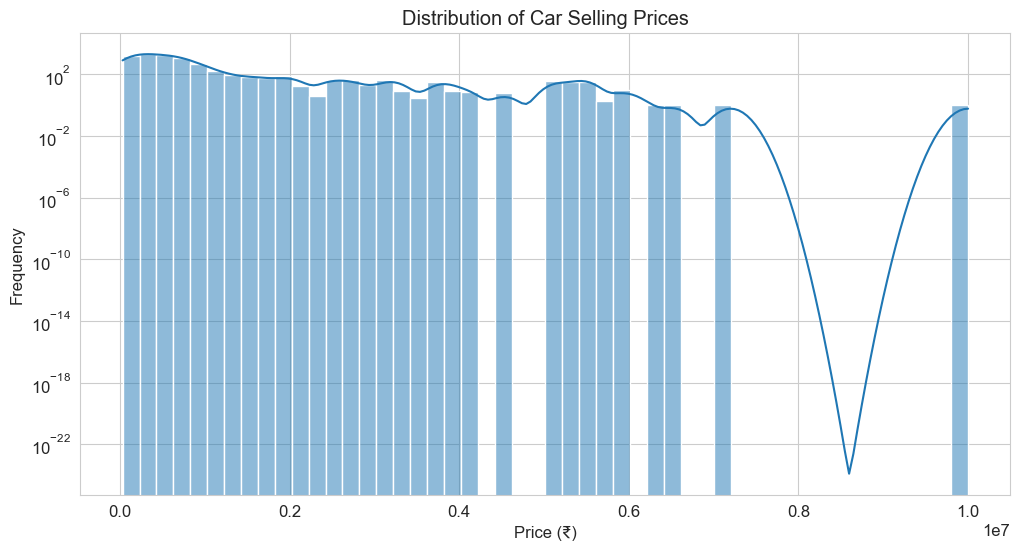

In [9]:
# Visualize the distribution of selling prices
plt.figure(figsize=(12, 6))
sns.histplot(df['selling_price'], bins=50, kde=True)
plt.title('Distribution of Car Selling Prices')
plt.xlabel('Price (₹)')
plt.ylabel('Frequency')
plt.yscale('log') 
plt.show()

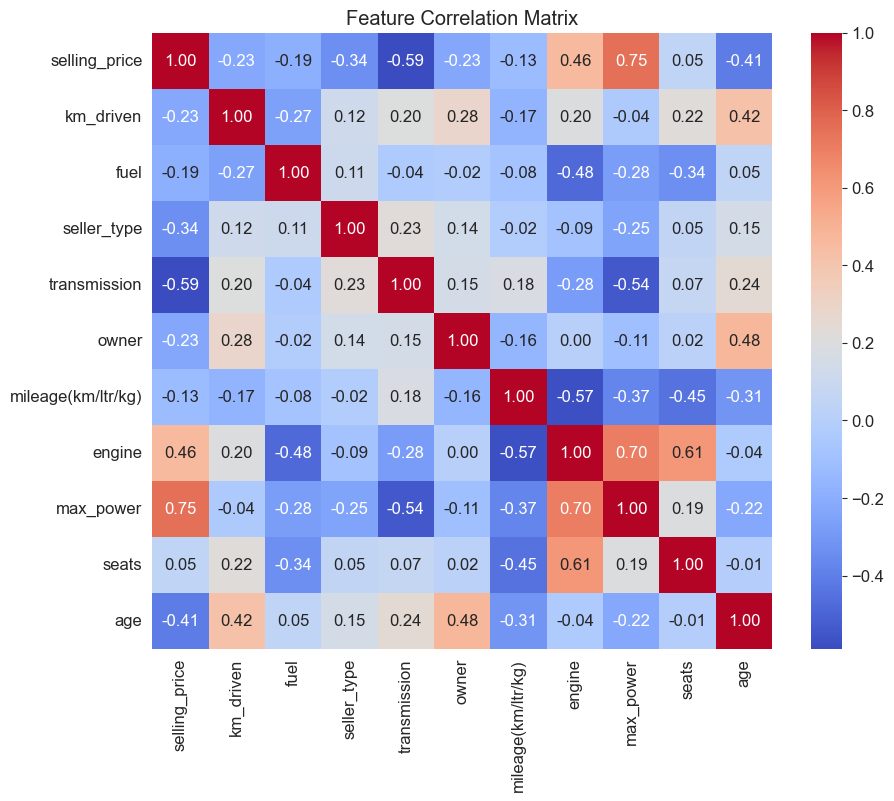

In [10]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

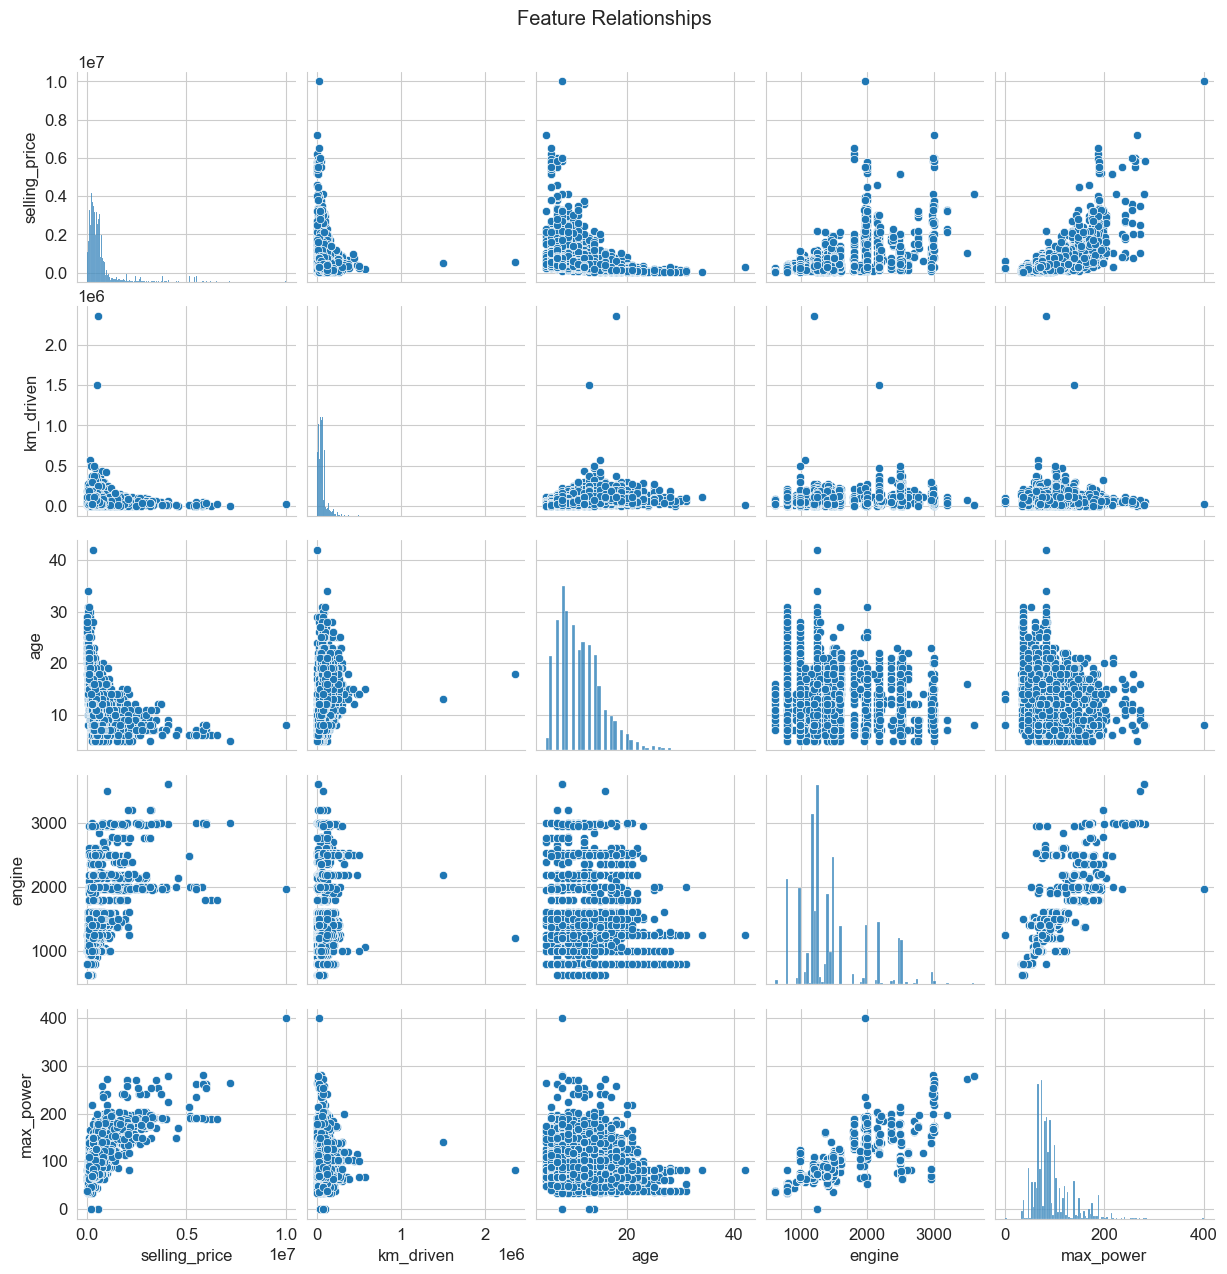

In [11]:
# Pairplot of key features
sns.pairplot(df[['selling_price', 'km_driven', 'age', 'engine', 'max_power']])
plt.suptitle('Feature Relationships', y=1.02)
plt.show()

In [12]:
X = df.drop('selling_price', axis=1)
y = df['selling_price']

# Split into train and test sets for regression
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Train: {X_train.shape}, Test: {X_test.shape}")

Train: (6502, 10), Test: (1626, 10)


In [ ]:
# Scale numerical features
scaler = StandardScaler()
num_cols = ['km_driven', 'mileage(km/ltr/kg)', 'engine', 'max_power', 'seats', 'age']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])
joblib.dump(scaler, 'models/scaler.pkl')

['scaler.pkl']

In [14]:
# Create classification problem
price_percentiles = np.percentile(y, [33, 66])
y_class = np.where(
    y < price_percentiles[0], 0, 
    np.where(y < price_percentiles[1], 1, 2)  
)

# Split for classification
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X, y_class, test_size=0.2, random_state=42
)
print(f"\n Train: {X_train_clf.shape}, Test: {X_test_clf.shape}")


 Train: (6502, 10), Test: (1626, 10)


In [15]:
# Scale for classification
X_train_clf_scaled = X_train_clf.copy()
X_test_clf_scaled = X_test_clf.copy()
X_train_clf_scaled[num_cols] = scaler.fit_transform(X_train_clf[num_cols])
X_test_clf_scaled[num_cols] = scaler.transform(X_test_clf[num_cols])



Price class distribution:


2    2785
1    2698
0    2645
Name: count, dtype: int64

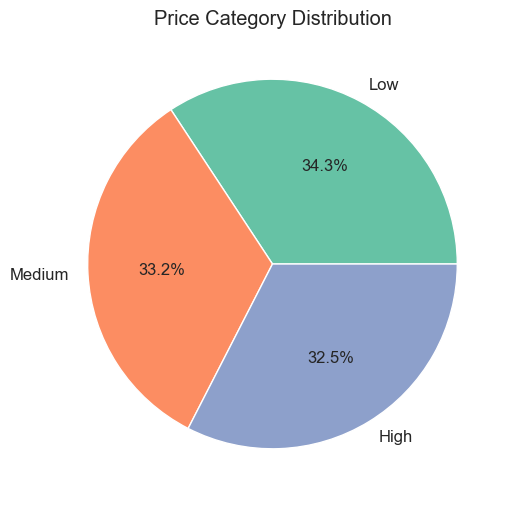

In [16]:
# Print price class distribution
print("\nPrice class distribution:")
class_counts = pd.Series(y_class).value_counts()
display(class_counts)

plt.figure(figsize=(8, 6))
class_counts.plot(kind='pie', autopct='%1.1f%%', 
                  labels=['Low', 'Medium', 'High'],
                  colors=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Price Category Distribution')
plt.ylabel('')
plt.show()


In [17]:
# using muliple models for regression and classification
models = {
    # Regression models
    'Linear Regression': LinearRegression(),
    'KNN Regressor': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost Regressor': XGBRegressor(random_state=42),
    'Bagging Regressor': BaggingRegressor(random_state=42),
    'Extra Trees Regressor': ExtraTreesRegressor(random_state=42),
    
    # Classification models
    'SVC': SVC(random_state=42),
    'Gaussian NB': GaussianNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'XGBoost Classifier': XGBClassifier(random_state=42),
    'Gradient Boosting Classifier': GradientBoostingClassifier(random_state=42),
    'Multinomial NB': MultinomialNB()
}

In [18]:
regression_results = []
classification_results = []
# Train and evaluate models
for name, model in models.items():    
    try:
        if name in ['SVC', 'Gaussian NB', 'Logistic Regression', 
                   'XGBoost Classifier', 'Gradient Boosting Classifier',
                   'Multinomial NB']:
            # Classification models
            model.fit(X_train_clf_scaled, y_train_clf)
            y_pred = model.predict(X_test_clf_scaled)
            accuracy = accuracy_score(y_test_clf, y_pred)
            report = classification_report(y_test_clf, y_pred, output_dict=True)
            
            classification_results.append({
                'Model': name,
                'Accuracy': accuracy,
                'Precision': report['weighted avg']['precision'],
                'Recall': report['weighted avg']['recall'],
                'F1-Score': report['weighted avg']['f1-score']
            })
            
            print(f"Classification Accuracy: {accuracy:.4f}")
            print(classification_report(y_test_clf, y_pred))
            
        else:
            # Regression models
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            
            mae = mean_absolute_error(y_test, y_pred)
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            r2 = r2_score(y_test, y_pred)
            
            regression_results.append({
                'Model': name,
                'MAE': mae,
                'RMSE': rmse,
                'R2': r2
            })
            
            print(f"MAE: {mae:,.2f}")
            print(f"RMSE: {rmse:,.2f}")
            print(f"R2: {r2:.4f}")
            
    except Exception as e:
        print(f"Error with {name}: {str(e)}")


MAE: 270,951.27
RMSE: 452,778.31
R2: 0.6872
MAE: 94,938.77
RMSE: 183,350.24
R2: 0.9487
MAE: 87,238.13
RMSE: 245,677.86
R2: 0.9079
MAE: 70,180.42
RMSE: 145,183.51
R2: 0.9678
MAE: 92,250.33
RMSE: 165,192.99
R2: 0.9584
MAE: 70,202.56
RMSE: 145,388.37
R2: 0.9678
MAE: 73,295.85
RMSE: 157,875.19
R2: 0.9620
MAE: 66,614.36
RMSE: 132,523.58
R2: 0.9732
Classification Accuracy: 0.8007
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       525
           1       0.71      0.74      0.72       567
           2       0.84      0.84      0.84       534

    accuracy                           0.80      1626
   macro avg       0.81      0.80      0.80      1626
weighted avg       0.80      0.80      0.80      1626

Classification Accuracy: 0.6402
              precision    recall  f1-score   support

           0       0.65      0.87      0.75       525
           1       0.51      0.43      0.47       567
           2       0.76      0.63      0.69    


REGRESSION MODEL RESULTS


,Model,MAE,RMSE,R2
7,Extra Trees Regressor,66614.36,132523.58,0.97
3,Random Forest,70180.42,145183.51,0.97
5,XGBoost Regressor,70202.56,145388.37,0.97
6,Bagging Regressor,73295.85,157875.19,0.96
4,Gradient Boosting,92250.33,165192.99,0.96
1,KNN Regressor,94938.77,183350.24,0.95
2,Decision Tree,87238.13,245677.86,0.91
0,Linear Regression,270951.27,452778.31,0.69


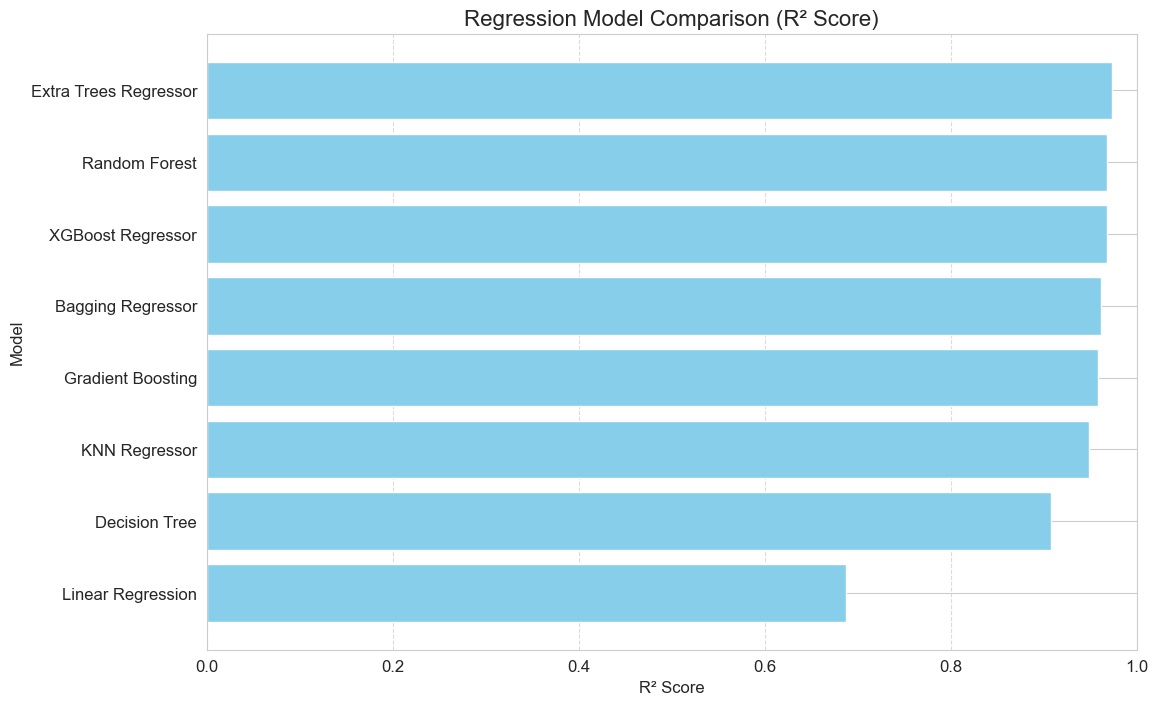

In [19]:
# Display regression results
if regression_results:
    print("\n" + "="*50)
    print("REGRESSION MODEL RESULTS")
    print("="*50)
    reg_df = pd.DataFrame(regression_results)
    display(reg_df.sort_values('R2', ascending=False))
    
    # Plot regression model comparison
    plt.figure(figsize=(12, 8))
    sorted_reg = reg_df.sort_values('R2')
    plt.barh(sorted_reg['Model'], sorted_reg['R2'], color='skyblue')
    plt.title('Regression Model Comparison (R² Score)', fontsize=16)
    plt.xlabel('R² Score', fontsize=12)
    plt.ylabel('Model', fontsize=12)
    plt.xlim(0, 1)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()


CLASSIFICATION MODEL RESULTS


,Model,Accuracy,Precision,Recall,F1-Score
3,XGBoost Classifier,0.85,0.85,0.85,0.85
4,Gradient Boosting Classifier,0.85,0.85,0.85,0.85
0,SVC,0.80,0.80,0.80,0.80
2,Logistic Regression,0.78,0.78,0.78,0.78
1,Gaussian NB,0.64,0.64,0.64,0.63


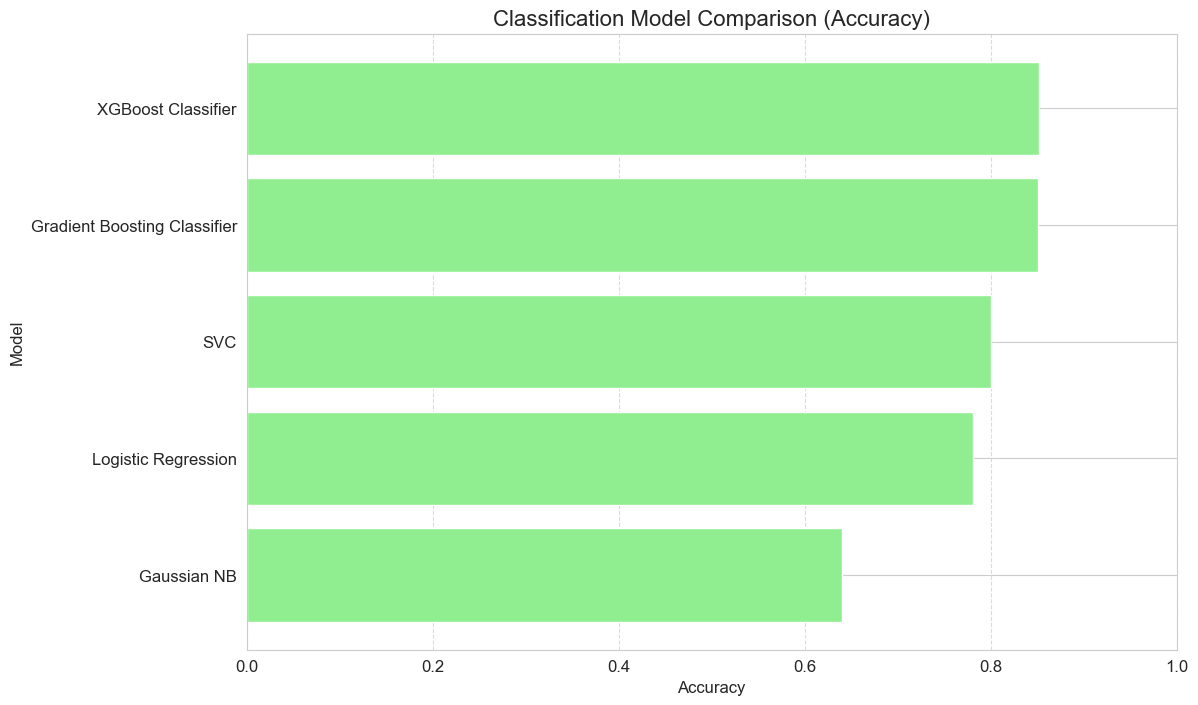

In [20]:
# Display classification results
if classification_results:
    print("\n" + "="*50)
    print("CLASSIFICATION MODEL RESULTS")
    print("="*50)
    clf_df = pd.DataFrame(classification_results)
    display(clf_df.sort_values('Accuracy', ascending=False))
    
    # Plot classification accuracy comparison
    plt.figure(figsize=(12, 8))
    sorted_clf = clf_df.sort_values('Accuracy')
    plt.barh(sorted_clf['Model'], sorted_clf['Accuracy'], color='lightgreen')
    plt.title('Classification Model Comparison (Accuracy)', fontsize=16)
    plt.xlabel('Accuracy', fontsize=12)
    plt.ylabel('Model', fontsize=12)
    plt.xlim(0, 1)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

Best Regression Model: Extra Trees Regressor (R²: 0.9732)


C:\Users\karan\AppData\Local\Temp\ipykernel_75824\1703742495.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.values, y=importances.index, palette='viridis')


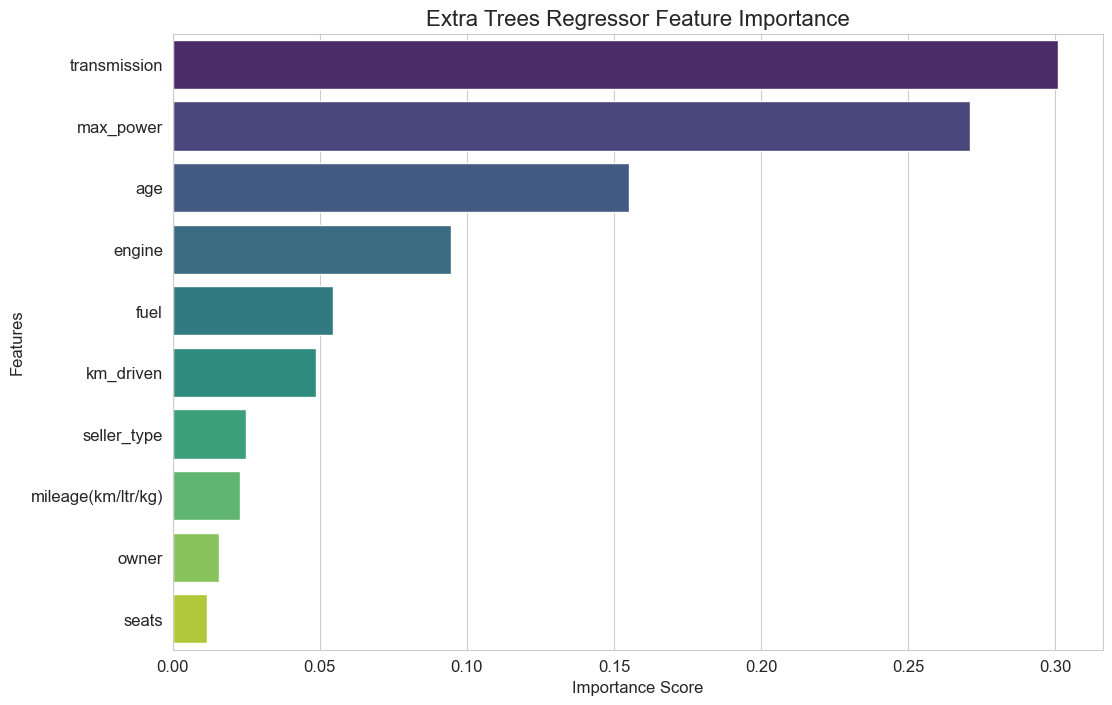

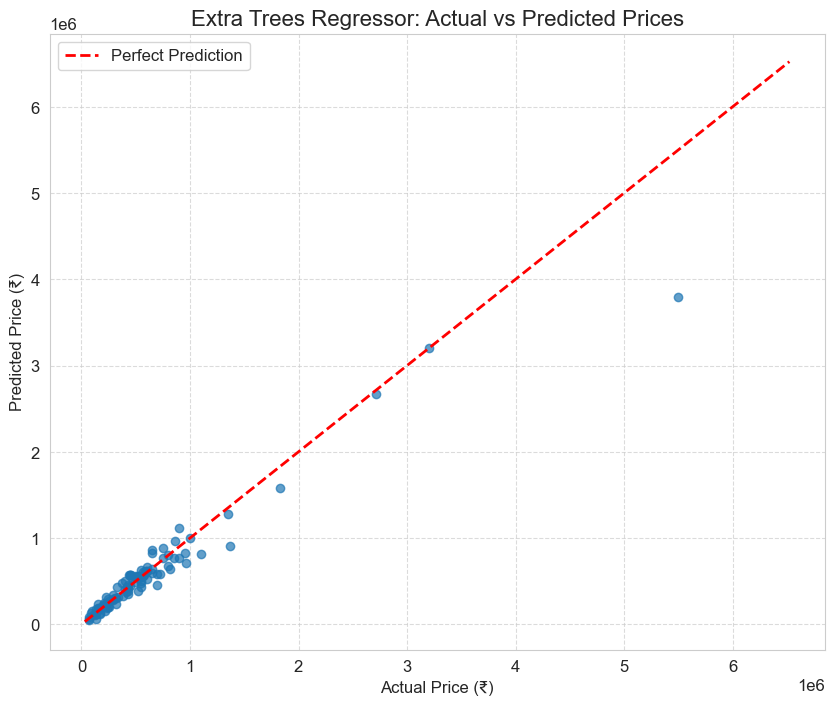

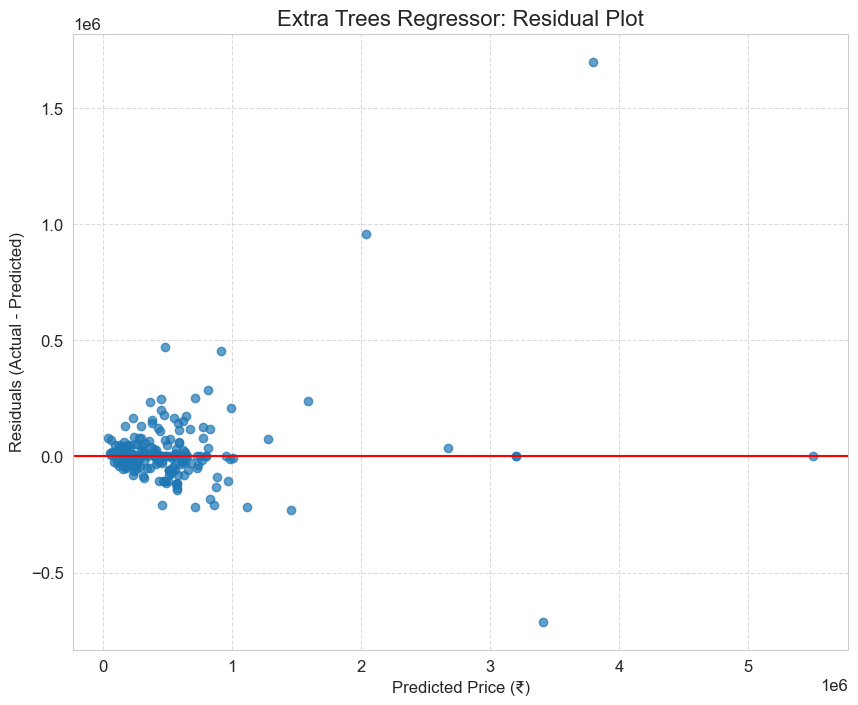

In [21]:
# Identify best regression model
if regression_results:
    best_reg = reg_df.loc[reg_df['R2'].idxmax()]
    print(f"Best Regression Model: {best_reg['Model']} (R²: {best_reg['R2']:.4f})")
    best_reg_model = models[best_reg['Model']]
    
    # Feature Importance
    if hasattr(best_reg_model, 'feature_importances_'):
        plt.figure(figsize=(12, 8))
        importances = pd.Series(
            best_reg_model.feature_importances_,
            index=X.columns
        ).sort_values(ascending=False)
        
        sns.barplot(x=importances.values, y=importances.index, palette='viridis')
        plt.title(f"{best_reg['Model']} Feature Importance", fontsize=16)
        plt.xlabel('Importance Score', fontsize=12)
        plt.ylabel('Features', fontsize=12)
        plt.show()
    
    # Actual vs Predicted plot
    plt.figure(figsize=(10, 8))
    y_pred = best_reg_model.predict(X_test)
    
    # Plot the first 100 points for clarity
    plt.scatter(y_test[:100], y_pred[:100], alpha=0.7)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 
             'r--', lw=2, label='Perfect Prediction')
    
    plt.title(f"{best_reg['Model']}: Actual vs Predicted Prices", fontsize=16)
    plt.xlabel('Actual Price (₹)', fontsize=12)
    plt.ylabel('Predicted Price (₹)', fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()
    
    # Residual plot
    plt.figure(figsize=(10, 8))
    residuals = y_test - y_pred
    plt.scatter(y_pred[:200], residuals[:200], alpha=0.7)
    plt.axhline(y=0, color='r', linestyle='-')
    plt.title(f"{best_reg['Model']}: Residual Plot", fontsize=16)
    plt.xlabel('Predicted Price (₹)', fontsize=12)
    plt.ylabel('Residuals (Actual - Predicted)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()



Best Classification Model: XGBoost Classifier (Accuracy: 0.8524)


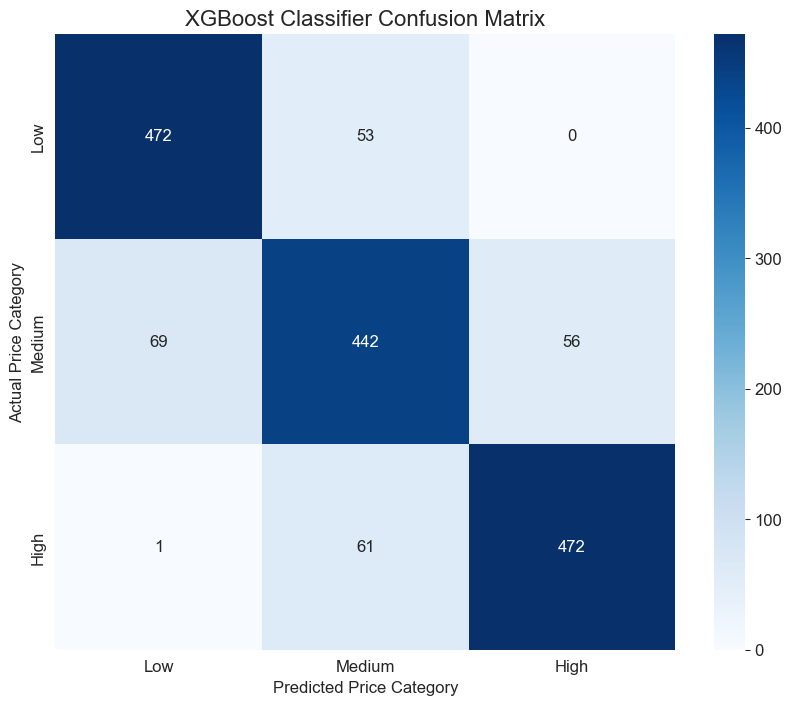


Classification Report:
              precision    recall  f1-score   support

         Low       0.87      0.90      0.88       525
      Medium       0.79      0.78      0.79       567
        High       0.89      0.88      0.89       534

    accuracy                           0.85      1626
   macro avg       0.85      0.85      0.85      1626
weighted avg       0.85      0.85      0.85      1626



In [22]:
# Identify best classification model
if classification_results:
    best_clf = clf_df.loc[clf_df['Accuracy'].idxmax()]
    print(f"\nBest Classification Model: {best_clf['Model']} (Accuracy: {best_clf['Accuracy']:.4f})")
    best_clf_model = models[best_clf['Model']]
    
    # Confusion Matrix
    y_pred = best_clf_model.predict(X_test_clf_scaled)
    cm = confusion_matrix(y_test_clf, y_pred)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        cm, annot=True, fmt='d', cmap='Blues',
        xticklabels=['Low', 'Medium', 'High'],
        yticklabels=['Low', 'Medium', 'High']
    )
    plt.title(f"{best_clf['Model']} Confusion Matrix", fontsize=16)
    plt.xlabel('Predicted Price Category', fontsize=12)
    plt.ylabel('Actual Price Category', fontsize=12)
    plt.show()

        # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test_clf, y_pred, 
                                target_names=['Low', 'Medium', 'High']))

In [ ]:
if regression_results:
    joblib.dump(best_reg_model, 'models/best_regression_model.pkl')
if classification_results:
    joblib.dump(best_clf_model, 'models/best_classification_model.pkl')
    
print("Best models saved successfully!")

Best models saved successfully!
